<a href="https://colab.research.google.com/github/millejade/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('linear-regression')
jovian.set_colab_id('1rCB-G4fIdXO8CxKmPdxGI7lPHagoAyA0')

Download the data using **urlretrieve** function from  **urllib.request**

In [139]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [140]:
from urllib.request import urlretrieve

In [141]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fbd89560b90>)

Create Pandas **`dataframe(df)`** using the downloaded file to view and analyze the data

In [142]:
!pip install pandas --quiet
import pandas as pd

In [143]:
medical_df = pd.read_csv('medical.csv')  # read the csv file

Our ***`target`*** is the **charges** column while the rest of the columns are the ***`features`***. 
With historical data from 1338 customers, we can **`predict the charges for new customers`** by retrieving their information such as age, sex, BMI, # of children, smoking habit and region.

In [18]:
medical_df.info()  # checking datatype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
medical_df.describe()  # some statistics for numerical columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Saving our work on Jovian notebook!

 <b>Exploratory Analysis and Visualization:</b> Visualization of Data and their Relationships

In [20]:
!pip install plotly matplotlib seaborn --quiet

In [144]:
import plotly.express as px
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#  to ensure that our plots are shown and embedded within the Jupyter notebook itself. 
#  Without this command, sometimes plots may show up in pop-up windows.

In [145]:
sns.set_style('darkgrid')  # A dictionary of parameters or the name of a preconfigured style.
mplib.rcParams['font.size'] = 14
mplib.rcParams['figure.figsize'] = (10, 6)
mplib.rcParams['figure.facecolor'] = '#00000000'

 <b>AGE:</b> A numeric column. Min=18, Max=64

In [146]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Graph of Age Distribution using **_plotly.express_**

In [147]:
fig = px.histogram(medical_df,
                  x='age',
                  marginal='violin', # the violet figure at top for min, max, q1, median, q2
                  nbins=47,
                  color_discrete_sequence=['green'],
                  title='Distribution of Age')
fig.update_layout(bargap=0.05)  # gap between age
fig.show()

 <b>BMI:</b> Distribution of Body Mass Index using **_plotly.express_**

In [148]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box', # the violet figure at top for min, max, q1, median, q2
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI')
fig.update_layout(bargap=0.05)  # gap between age
fig.show()

**Charges-Smoker:** Charges in relation with smoker

In [149]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Charges in relation with smoker')
fig.update_layout(bargap=0.1)
fig.show()

**Charges-Sex:** Charges in relation with Sex

In [150]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex',
                   color_discrete_sequence=['yellow', 'blue'], 
                   title='Charges in relation with Sex')
fig.update_layout(bargap=0.1)
fig.show()

**Charges-Region:** Charges in relation with Region

In [151]:
fig = px.histogram(medical_df, 
                   x='region', 
                   y='charges',
                   marginal='box', 
                   color='region',
                   color_discrete_sequence=['pink', 'black', 'green', 'orange'], 
                   title='Charges in relation with Region')
fig.update_layout(bargap=0.1)
fig.show()

**Smoker:** Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [152]:
medical_df.smoker.value_counts()  # counts the number of smokers and non-smokers

no     1064
yes     274
Name: smoker, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

In [153]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

**Sex:** Distribution of Sex

In [154]:
fig = px.histogram(medical_df, 
                   x='sex', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Sex Distribution')
fig.update_layout(bargap=0.1)
fig.show()

**Children:** Distribution of Children

In [155]:
fig = px.histogram(medical_df, 
                   x='children', 
                   marginal='box', 
                   color_discrete_sequence=['orange'], 
                   title='Distribution of Children')
fig.update_layout(bargap=0.1)
fig.show()

**Region:** Distribution of Region

In [156]:
fig = px.histogram(medical_df, 
                   x='region', 
                   marginal='box', 
                   color_discrete_sequence=['black'], 
                   title='Distribution of Region')
fig.update_layout(bargap=0.1)
fig.show()

### Age and Charges
Relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges
Relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [157]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Children and Charges
Relationship between number of children and charges.

In [158]:
fig = px.violin(medical_df, 
                 x='children', 
                 y='charges', 
                 # color='smoker', 
                 title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Gender and Charges
Relationship between Gender and Charges

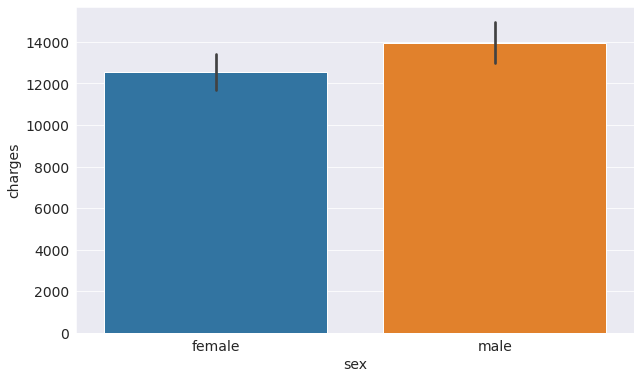

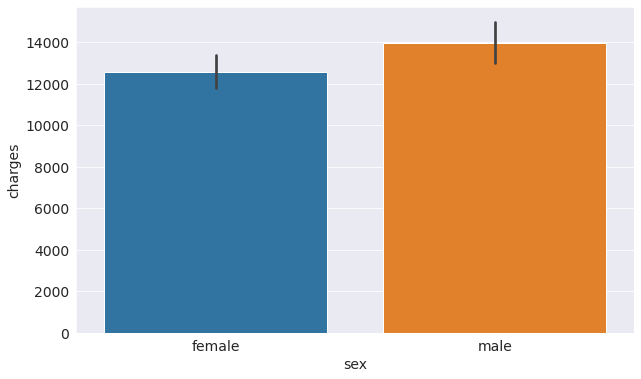

In [159]:
fig = sns.barplot(x='sex', 
                  y='charges',
                  data=medical_df)

### Region and Charges

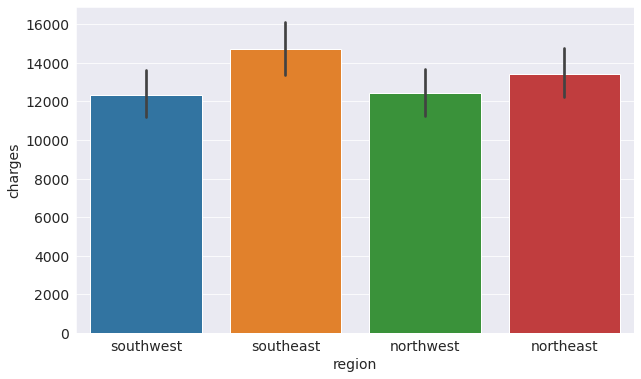

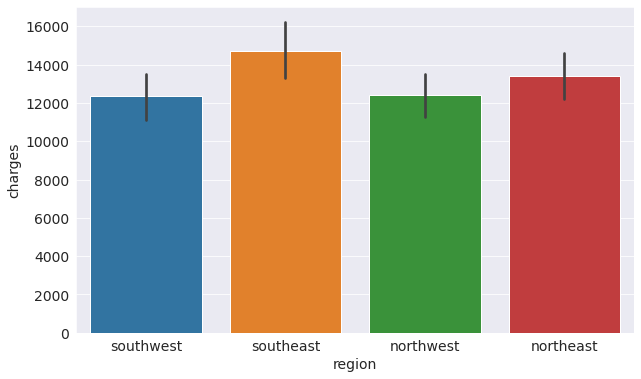

In [160]:
fig = sns.barplot(x='region', 
                  y='charges',
                  data=medical_df)

### Smoker and Charges

In [161]:
fig = px.violin(medical_df, 
                 x='smoker', 
                 y='charges', 
                 color='region', 
                 title='Smoker vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the __correlation coefficient__, which can be computed using the __.corr method__ of a Pandas series.

In [162]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

0.2990081933306476

In [163]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

0.19834096883362895

In [164]:
# To compute the correlation for categorical columns, 
#they must first be converted into numeric columns.
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)
# categorical columns -  data that generally takes a limited number of possible values.

0.787251430498478

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.


Pandas dataframes also provide a **.corr method** to compute the correlation coefficients between all pairs of numeric columns.

In [165]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

Text(0.5, 1.0, 'Correlation Matrix')

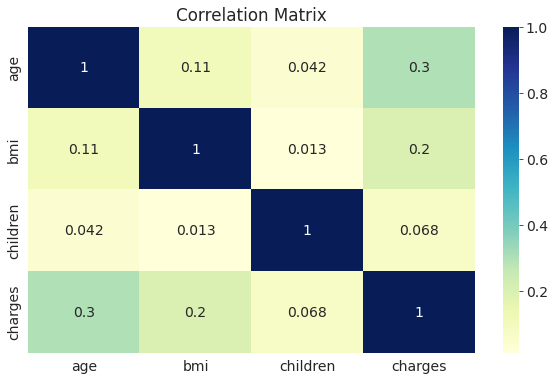

Text(0.5, 1.0, 'Correlation Matrix')

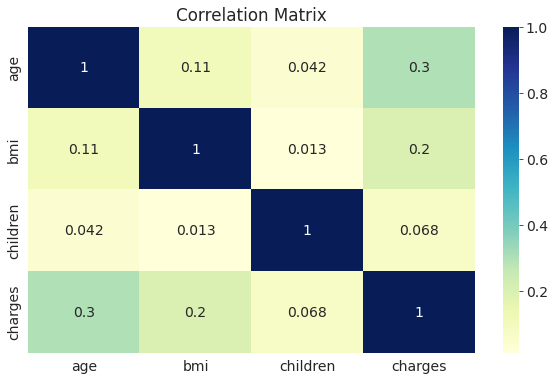

In [166]:
sns.heatmap(medical_df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [167]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
# print(non_smoker_df)
# data frame with people who are non-smoker only

### Age vs. Charges: for non-smoker

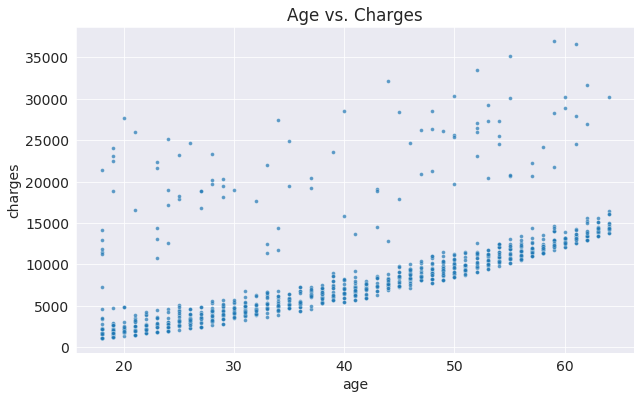

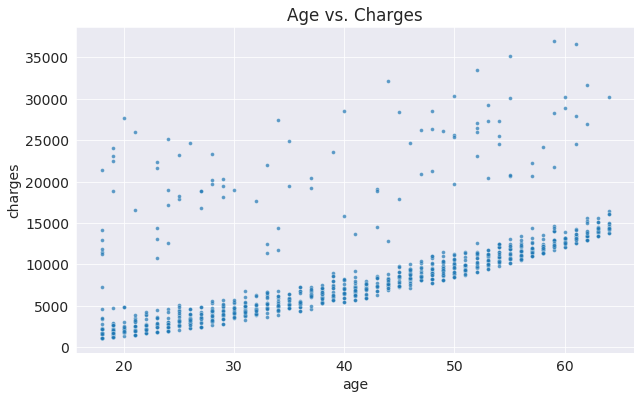

In [168]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$ --> $h(\theta) = \theta_0 + (\theta_1)(x_1)$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [169]:
def estimate_charges(age, w, b):  # very first model
    return w * age + b

In [170]:
w = 50
b = 100

In [171]:
ages = non_smoker_df.age  # age of non-smoker people
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimate Charges')

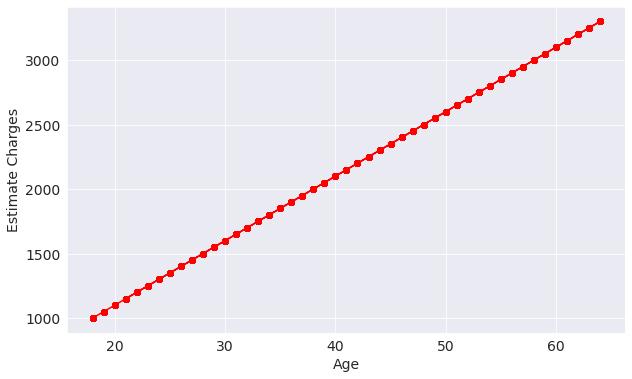

Text(0, 0.5, 'Estimate Charges')

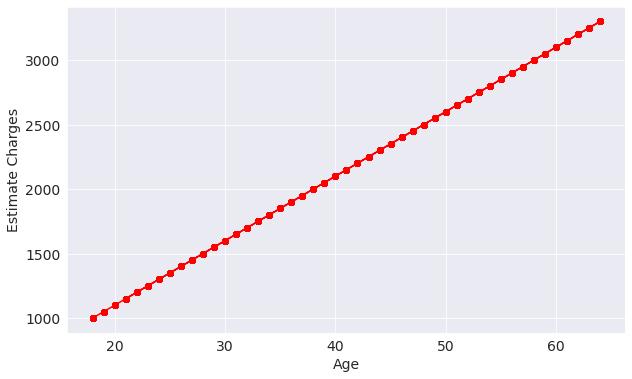

In [172]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimate Charges')

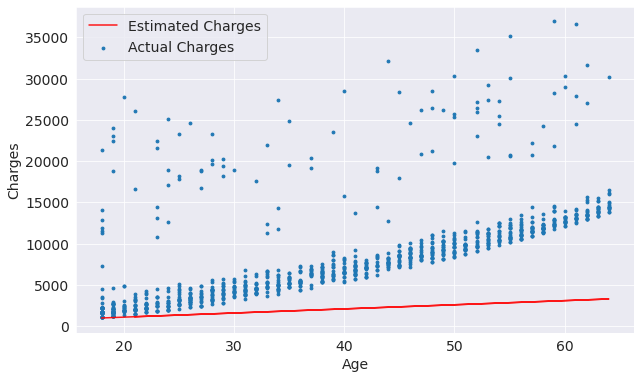

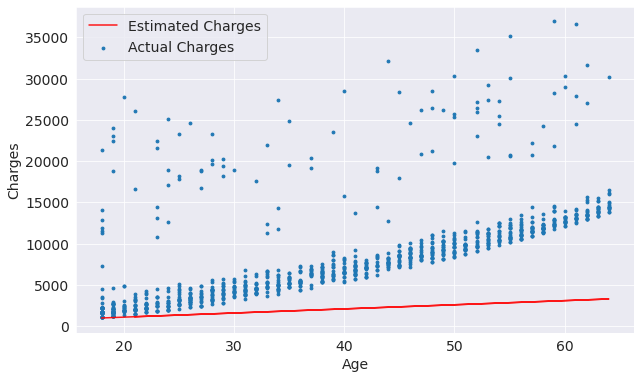

In [173]:
target = non_smoker_df.charges  # our y-axis/target/output

plt.plot(ages, estimated_charges, 'r', alpha=0.9)  # red line
plt.scatter(ages, target, s=8)  # blue scattered dots
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated Charges', 'Actual Charges'])


The estimated value is quiet poor and does not fit the data.
Changing our parameters $\theta$ or $w$ and $b$ will help to fit the data.

Let's create a function that will try different parameters.

In [174]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)  # red line
    plt.scatter(ages, target, s=8, alpha=0.8)  # blue scattered dots
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated Charges', 'Actual Charges'])

Observe what will happen if we change the **b** or  $\theta_0$ and let the **w** or $\theta_1$ remains the same.

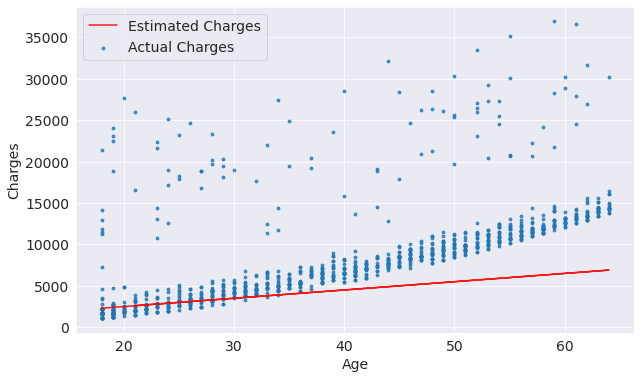

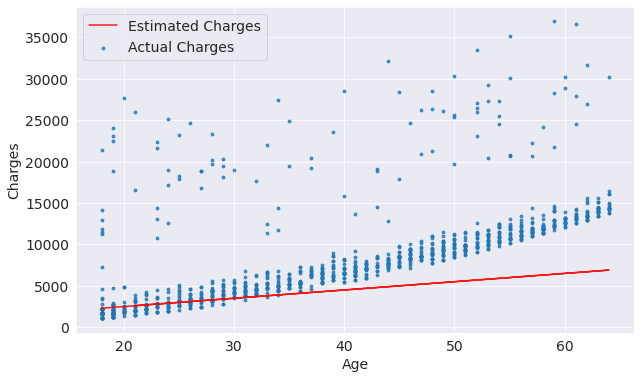

In [175]:
try_parameters(100, 500)

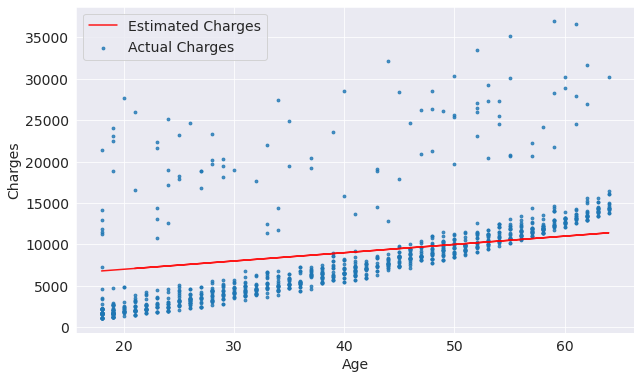

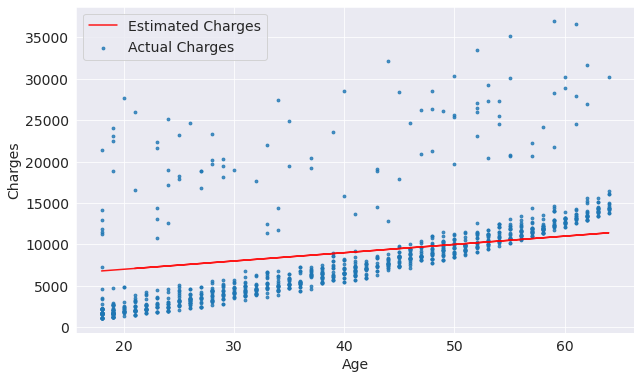

In [176]:
try_parameters(100, 5000)

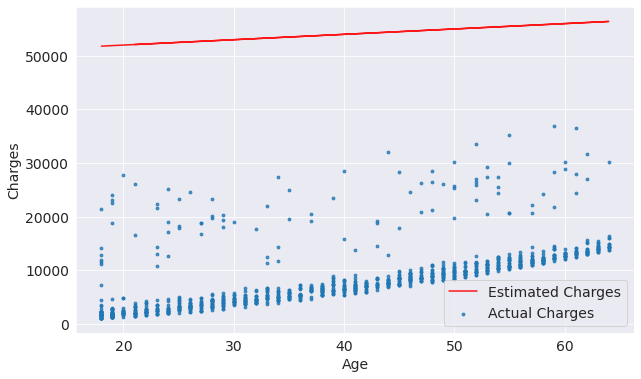

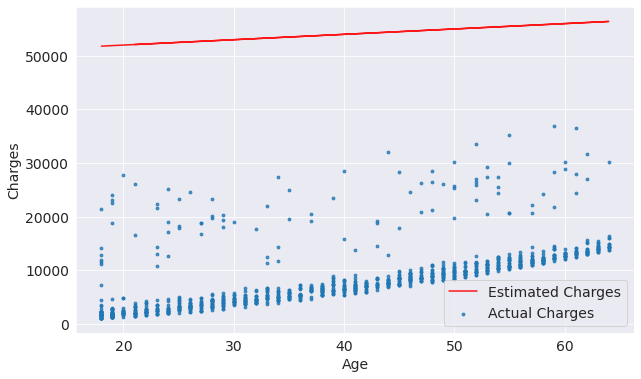

In [177]:
try_parameters(100, 50000)

Observe what will happen if we change the **w** or $\theta_1$ and let the **b** or $\theta_0$ remains the same.

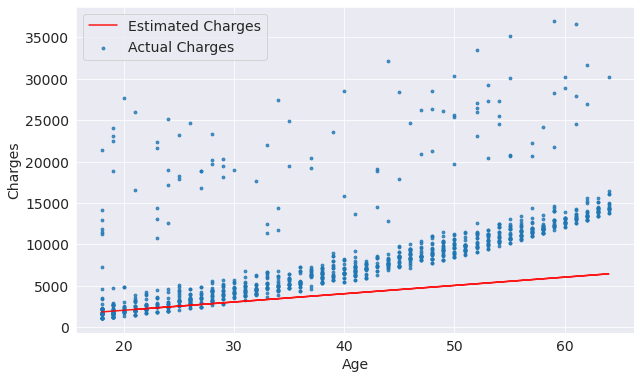

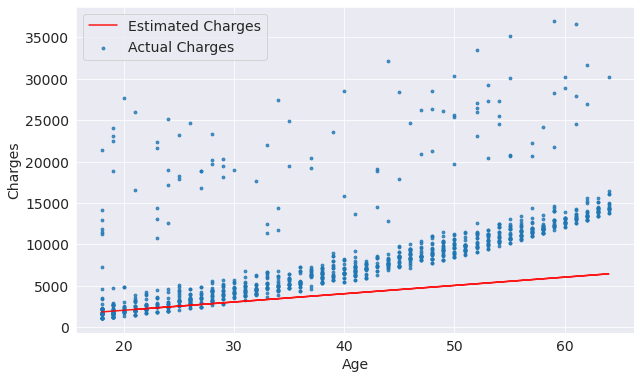

In [178]:
try_parameters(100, 50)

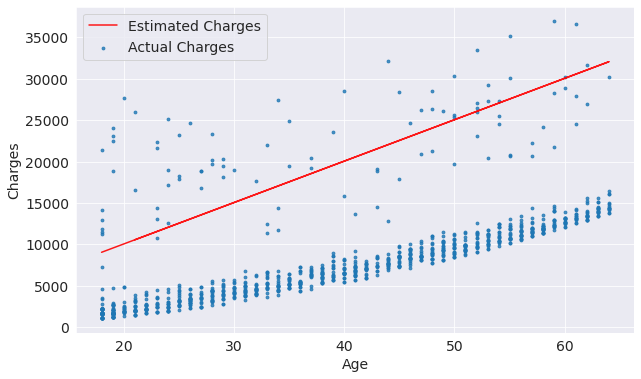

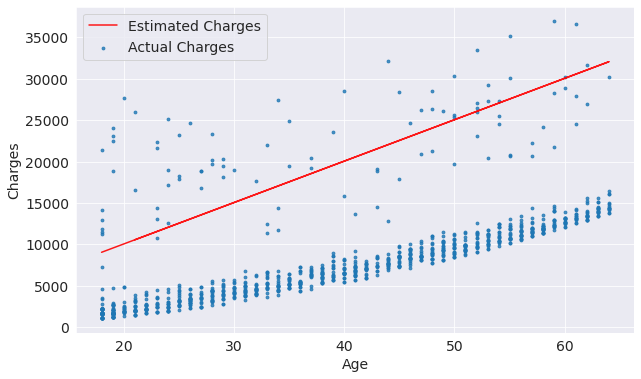

In [179]:
try_parameters(500, 50)

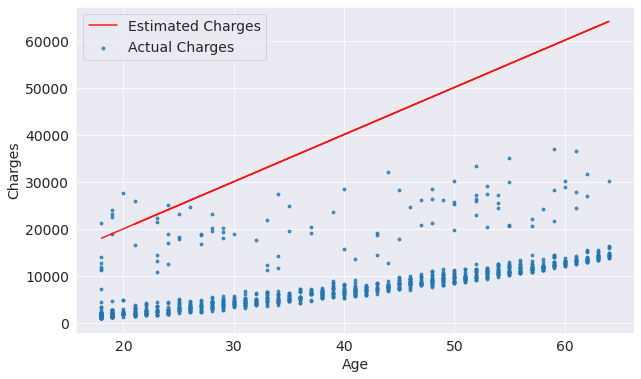

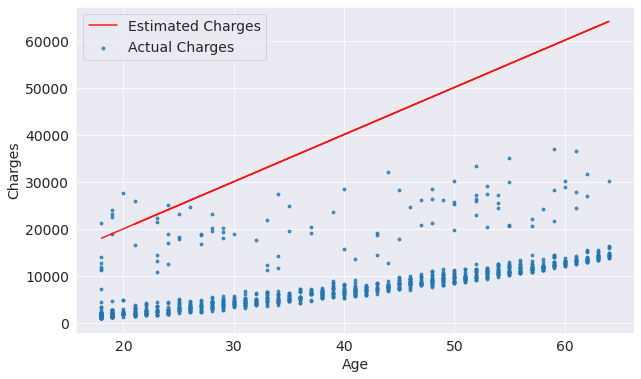

In [180]:
try_parameters(1000, 50)

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

Note: in Machine Learning course of Andrew Ng, cost function is shown below:

$J(\theta_0, \theta_1,...\theta_n) = 1/2m * sum([h_\theta (x^{(i)}) - y^{(i)}]^2)$

where:
    $h_\theta (x^{(i)}) = (\theta_0 + x_1 * \theta_1 +...+ x_n * \theta_n)$

  Defining a function to compute RMSE.

In [181]:
!pip install numpy --quiet

In [182]:
import numpy as np

In [183]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [184]:
w = 50
b = 100

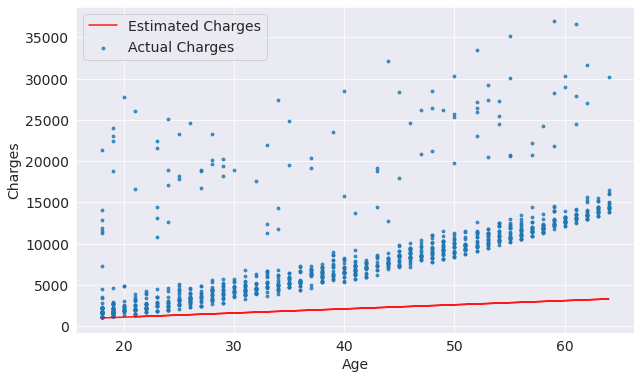

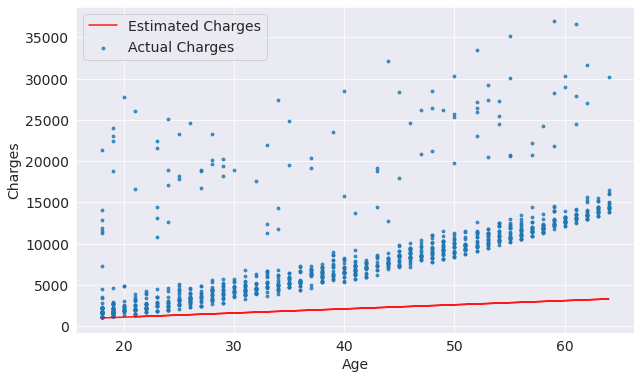

In [185]:
try_parameters(w, b)

In [186]:
targets = non_smoker_df['charges']  # charges for non_smokers
predicted = estimate_charges(non_smoker_df.age, w, b)

In [187]:
rmse(targets, predicted)

8461.949562575488

8461.949562575488

In [188]:
# modifying try_parameters
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


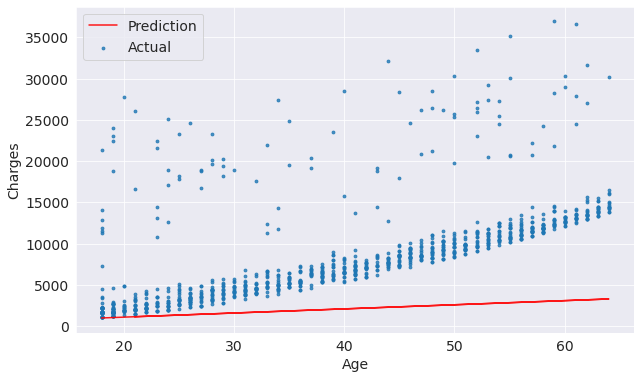

RMSE Loss:  8461.949562575488


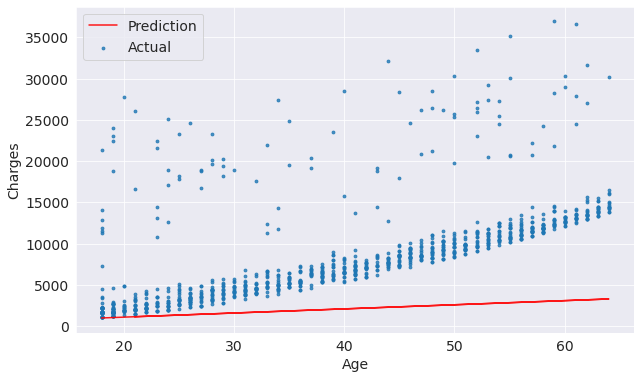

In [189]:
try_parameters(50, 100)

RMSE Loss:  8238.664307473255


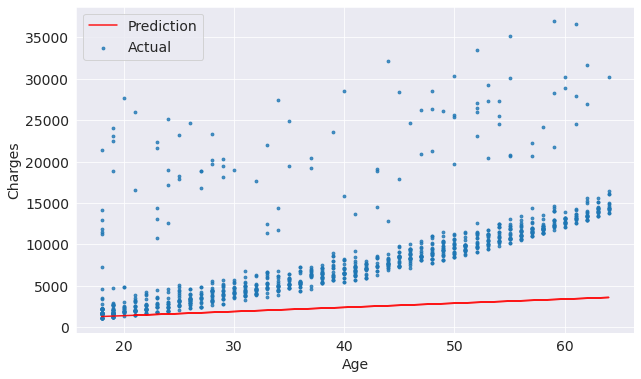

RMSE Loss:  8238.664307473255


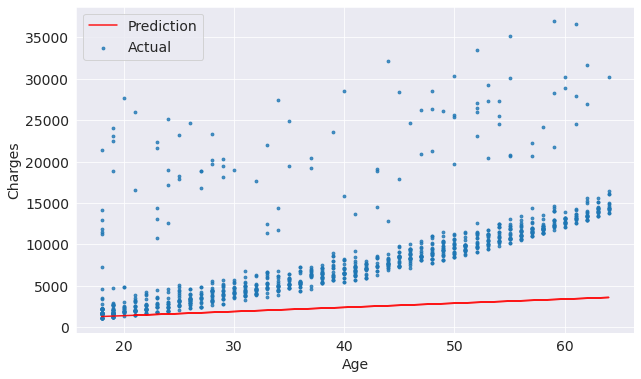

In [190]:
try_parameters(50, 400)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?


# Linear Regression using Library/Framework
### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

In [191]:
!pip install scikit-learn --quiet

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
model1 = LinearRegression() # create a model object

Note that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

### Fit the Model to the Data

In [194]:
input1 = non_smoker_df[['age']] # shape: (1064, 1)
target1 = non_smoker_df.charges # shape: (1064, )
print('inputs.shape :', input1.shape)
print('targes.shape :', target1.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)
inputs.shape : (1064, 1)
targes.shape : (1064,)


In [195]:
def check_param_non_smoker(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [196]:
model1.fit(input1, target1)

LinearRegression()

LinearRegression()

In [197]:
model1.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [198]:
prediction1 = model1.predict(input1)
print(prediction1)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [199]:
rmse(target1, prediction1)

4662.505766636391

4662.505766636391

Seems like our prediction is off by $4000$ on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [200]:
model1.coef_

array([267.24891283])

array([267.24891283])

In [201]:
model1.intercept_

-2091.4205565650864

-2091.4205565650864

RMSE Loss:  4662.505766636391


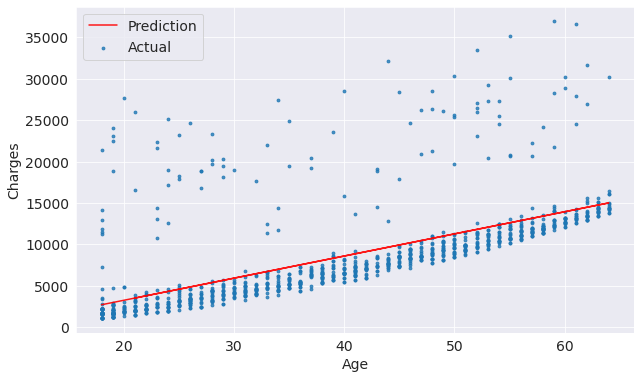

RMSE Loss:  4662.505766636391


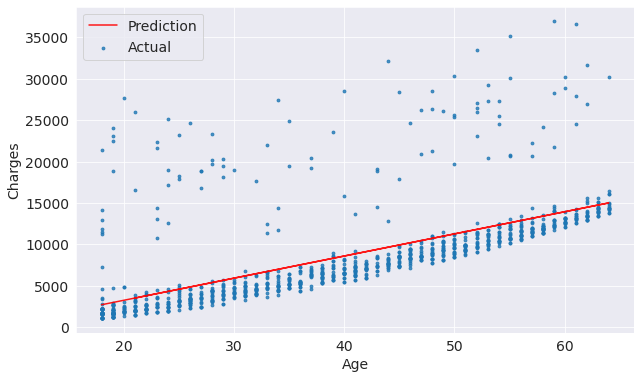

In [202]:
check_param_non_smoker(model1.coef_, model1.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 

> **EXERCISE**: Use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

In [203]:
from sklearn.linear_model import SGDRegressor

In [204]:
modelA = SGDRegressor() # create a model object

In [205]:
modelA.fit(input1, target1)

SGDRegressor()

SGDRegressor()

In [206]:
modelA.predict(np.array([[23],  # aged 23
                        [37],  # aged 37
                        [61]]))  # aged 61

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 1277.57540771,  5273.46207272, 12123.55349845])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 530.17106729, 3577.16392481, 8800.58025199])

In [207]:
predictionA = modelA.predict(input1)
print(predictionA)

[-149.52697265 2704.67778807 4131.78016843 ... -149.52697265 -149.52697265
  706.73445557]
[-558.04066754 1618.38280212 2706.59453695 ... -558.04066754 -558.04066754
   94.88637336]


In [208]:
rmse(target1, predictionA)

5287.220640097381

6406.592483669212

RMSE Loss:  5287.220640097381


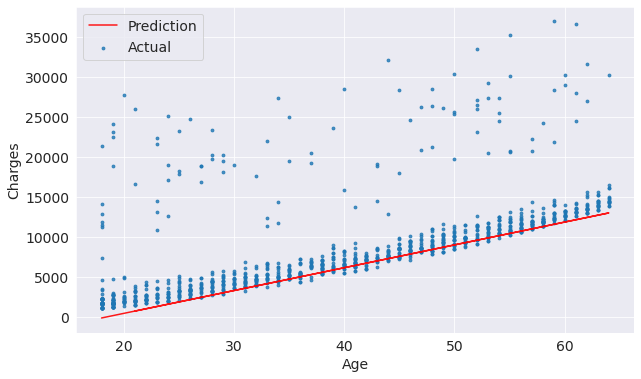

RMSE Loss:  6406.592483669212


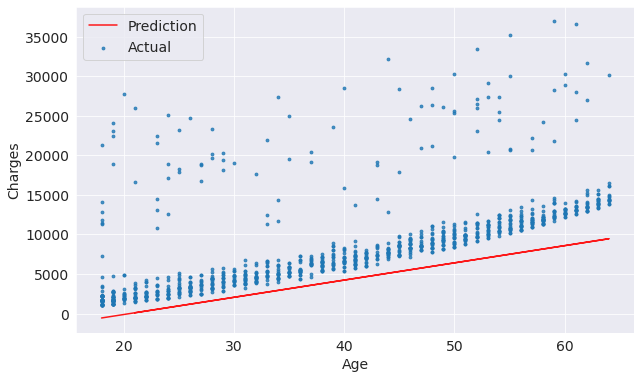

In [209]:
check_param_non_smoker(modelA.coef_, modelA.intercept_)

Full Code - Smokers

RMSE Loss:  10711.00334810241


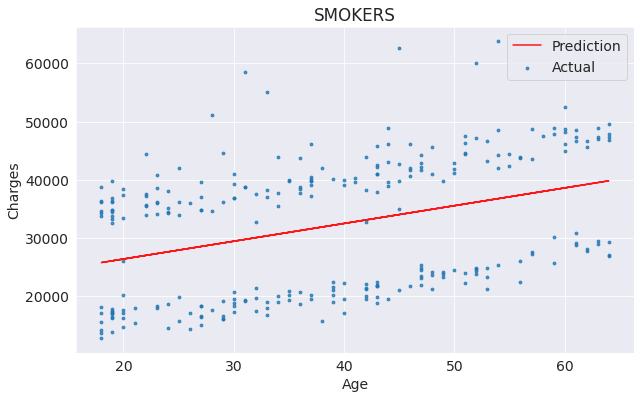

RMSE Loss:  10711.00334810241


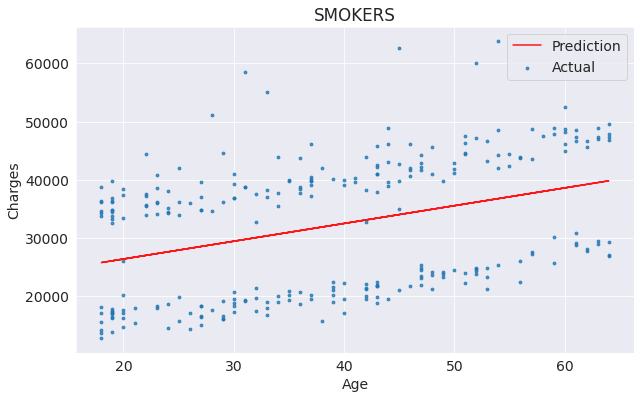

In [210]:
smokers_df = medical_df[medical_df.smoker == 'yes']
# plt.title('Age vs. Charges')
# sns.scatterplot(data=smokers_df, x='age', y='charges', alpha=0.7, s=15)

def estimating_charges(age, m, c):  # very first model
    return (m * age) + c

def calculate_loss(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

# modifying try_parameters
def check_param_smokers(m, c):
    ages = smokers_df.age
    target = smokers_df.charges
    predictions = estimating_charges(ages, m, c) # we can use model.predict instead of calling this function
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    plt.title('SMOKERS')
    
    loss = calculate_loss(target, predictions)
    print("RMSE Loss: ", loss)

model2 = LinearRegression()
input2 = smokers_df[['age']]
target2 = smokers_df.charges
# print(input2)
# print(target2)

model2.fit(input2, target2)
# print(model2.coef_)
# print(model2.intercept_)
# predicted_values2 = model2.predict(input2)
# print(predicted_values2)

check_param_smokers(model2.coef_, model2.intercept_)

### Machine Learning

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Loss: 4662.505766636391


Text(0.5, 1.0, 'Non-Smoker')

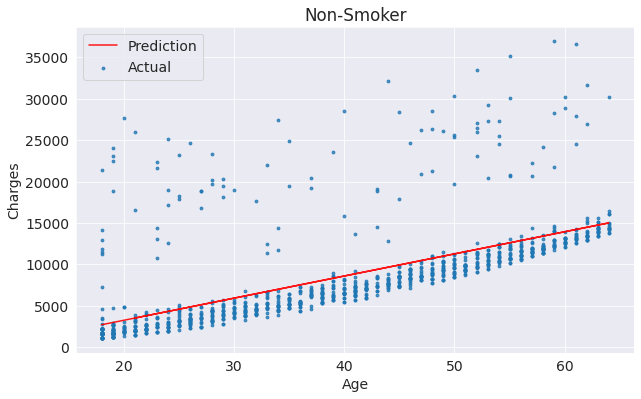

Loss: 4662.505766636391


Text(0.5, 1.0, 'Non-Smoker')

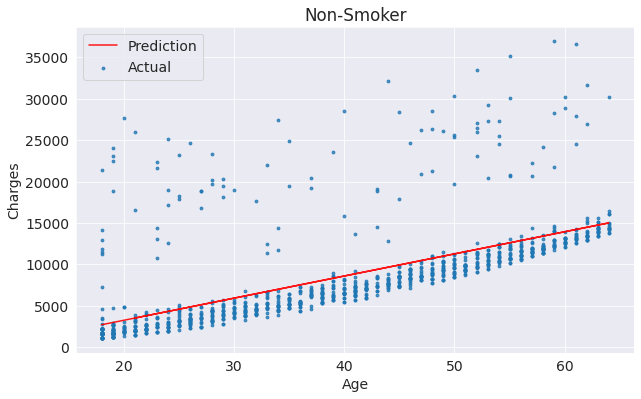

In [211]:
age3 = non_smoker_df.age
# Create inputs and targets
input3, target3 = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model3 = LinearRegression().fit(input1, target1)

# Generate predictions
prediction3 = model3.predict(input3)

# Compute loss to evalute the model
loss3 = calculate_loss(target3, prediction3)
print('Loss:', loss3)

plt.plot(age3, prediction3, 'r', alpha=0.9);
plt.scatter(age3,target3, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual']);
plt.title('Non-Smoker')

Loss: 10711.00334810241


Text(0.5, 1.0, 'Smoker')

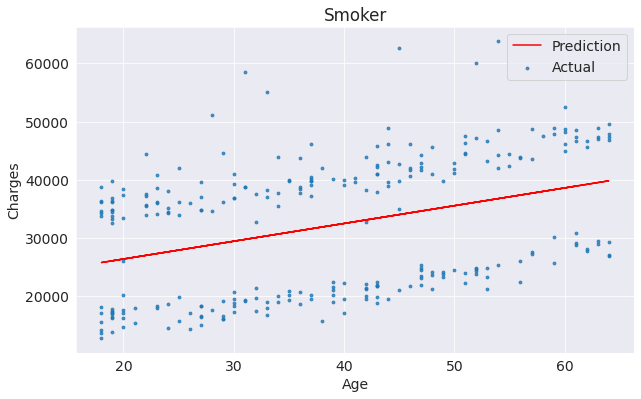

Loss: 10711.00334810241


Text(0.5, 1.0, 'Smoker')

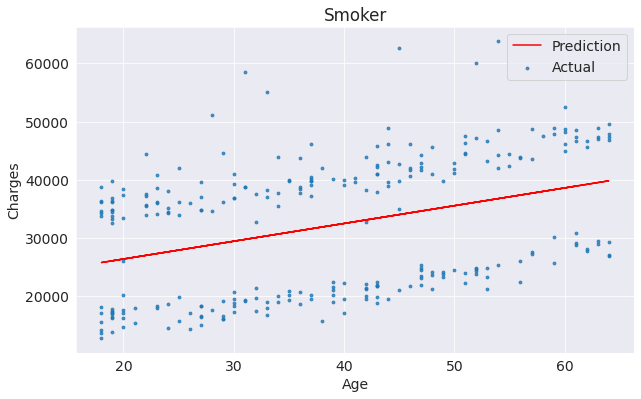

In [212]:
age4 = smokers_df.age
# Create inputs and targets
input4, target4 = smokers_df[['age']], smokers_df['charges']

model4 = LinearRegression()

# Create and train the model
model4.fit(input4, target4)

# Generate predictions
prediction4 = model4.predict(input4)
 
# Compute loss to evalute the model
loss4 = calculate_loss(target4, prediction4) # call our calculate_loss function
print('Loss:', loss4)

plt.plot(age4, prediction4, 'r')
plt.scatter(age4, target4, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual'])
plt.title('Smoker')

# Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [213]:
# Create inputs and targets
input5, target5 = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model5 = LinearRegression().fit(input5, target5)

# Generate predictions
prediction5 = model5.predict(input5)

# Compute loss to evalute the model
loss5 = calculate_loss(target5, prediction5)
print('Loss:', loss5)

Loss: 4662.312835461298
Loss: 4662.312835461298


In [214]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833268

0.08403654312833268

In [215]:
figA = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
figA.update_traces(marker_size=5)
figA.show()

Visualize 3 variables **age**, **bmi**, and **charges** using 3D plot.

In [216]:
figB = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
figB.update_traces(marker_size=3, marker_opacity=0.5)
figB.show()

In [217]:
print(non_smoker_df.age.corr(non_smoker_df.bmi))
print(non_smoker_df.charges.corr(non_smoker_df.age))
print(non_smoker_df.bmi.corr(non_smoker_df.charges))

0.12263798130263143
0.6279467837664193
0.08403654312833268
0.12263798130263143
0.6279467837664193
0.08403654312833268


In [218]:
model5.coef_, model5.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Loss: 5969.772531913287


Text(0.5, 1.0, 'Non-Smoker')

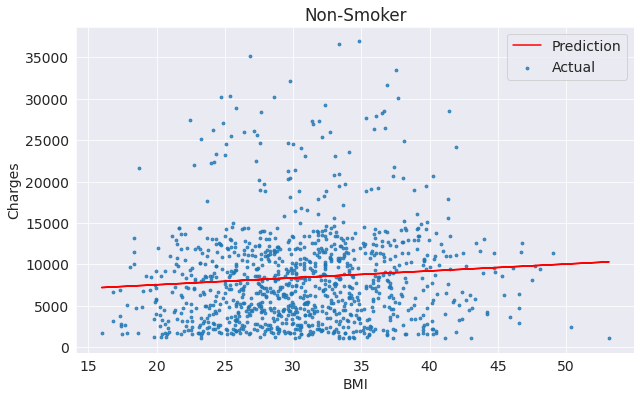

Loss: 5969.772531913287


Text(0.5, 1.0, 'Non-Smoker')

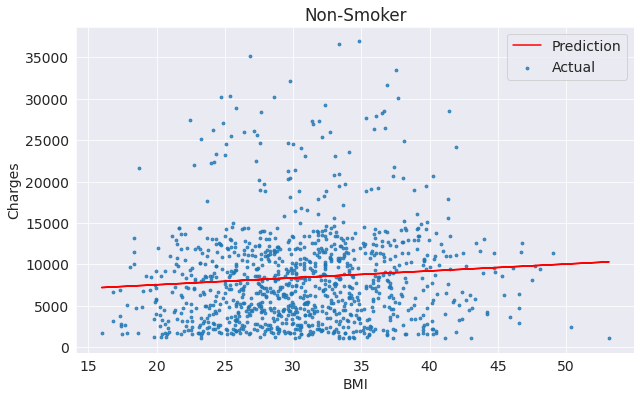

In [219]:
bmi6 = non_smoker_df.bmi
# Create inputs and targets
input6, target6 = non_smoker_df[['bmi']], non_smoker_df['charges']

model6 = LinearRegression()

# Create and train the model
model6.fit(input6, target6)

# Generate predictions
prediction6 = model6.predict(input6)
 
# Compute loss to evalute the model
loss6 = calculate_loss(target6, prediction6) # call our calculate_loss function
print('Loss:', loss6)

plt.plot(bmi6, prediction6, 'r')
plt.scatter(bmi6, target6, s=8, alpha=0.8)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual'])
plt.title('Non-Smoker')

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$


In [220]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542194

0.13892870453542194

In [221]:
figC = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
figC.update_traces(marker_size=4, marker_opacity=0.7)
figC.show()

In [222]:
# Create inputs and targets
input7, target7 = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model7 = LinearRegression().fit(input7, target7)

# Generate predictions
predictions7 = model7.predict(input7)

# Compute loss to evalute the model
loss7 = calculate_loss(target7, predictions7)
print('Loss:', loss7)

Loss: 4608.470405038245
Loss: 4608.470405038245


In [223]:
smokers_df.charges.corr(smokers_df.children)

0.035945005812685865

0.035945005812685865

In [224]:
figD = px.strip(smokers_df, x='children', y='charges', title="Children vs. Charges - Smokers")
figD.update_traces(marker_size=4, marker_opacity=0.7)
figD.show()

In [225]:
input8, target8 = smokers_df[['age', 'bmi', 'children']], smokers_df['charges']
model8 = LinearRegression().fit(input8, target8)
predictions8 = model8.predict(input8)
loss8 = calculate_loss(target8, predictions8)
print('Loss: ', loss8)

Loss:  5718.202480524153
Loss:  5718.202480524153


In [226]:
# Create inputs and targets
input9, target9 = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model9 = LinearRegression().fit(input9, target9)

# Generate predictions
predictions9 = model9.predict(input9)

# Compute loss to evalute the model
loss9 = rmse(target9, predictions9)
print('Loss:', loss9)

Loss: 11355.317901125969
Loss: 11355.317901125969


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals


## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

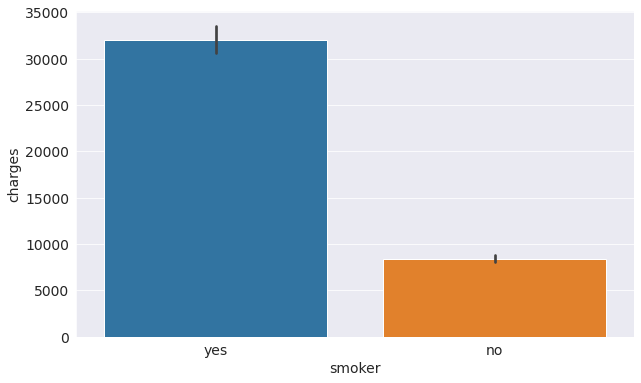

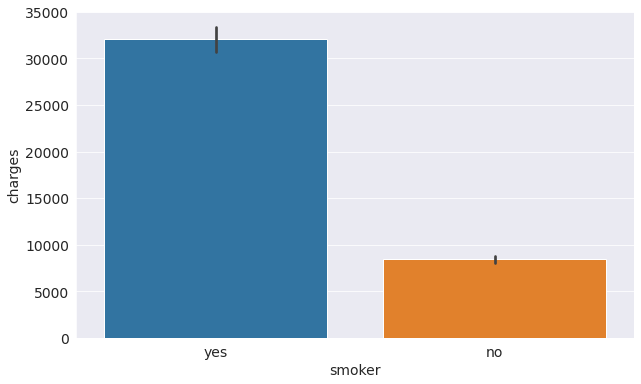

In [227]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [228]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
# print(smoker_codes)
# print(medical_df.smoker_code)

In [229]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

0.787251430498478

In [230]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [231]:
input10, target10 = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model10 = LinearRegression()
model10.fit(input10, target10)
predictions10 = model10.predict(input10)
loss10 = calculate_loss(target10, predictions10)
print('Loss: ', loss10)

Loss:  6056.439217188077
Loss:  6056.439217188077


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

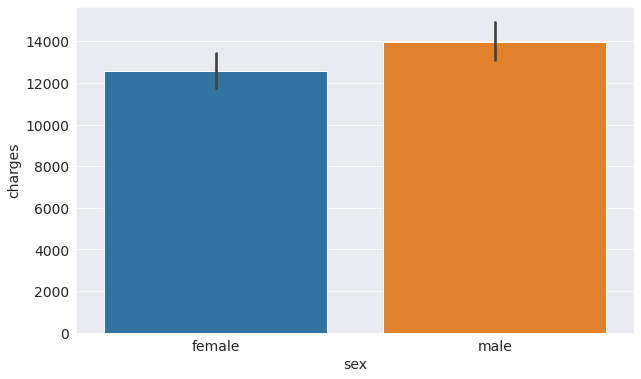

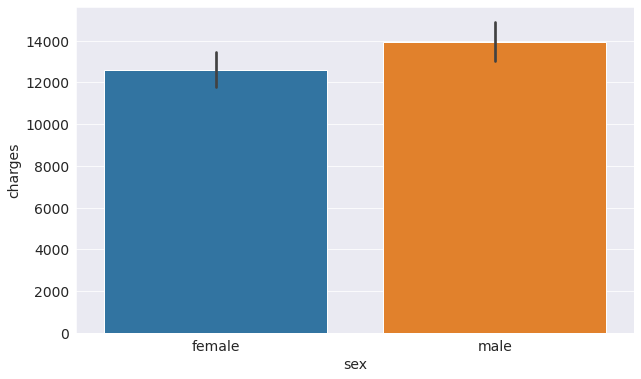

In [232]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [233]:
sex_codes = {'female': 0, 'male': 1}

In [234]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [235]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

0.057292062202025484

In [236]:
input11, target11 = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model11 = LinearRegression()
model11.fit(input11, target11)
predictions11 = model11.predict(input11)
loss11 = calculate_loss(target11, predictions11)
print('Loss: ', loss11)

Loss:  6056.100708754539
Loss:  6056.100708754539


If we look at its `correlation`, it is very low so it will not have a significant effect to reduce the loss

## Region: One-Hot Encoding
The **region** column has 4 values. Use `ohe-hot encoding` then create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.

One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.

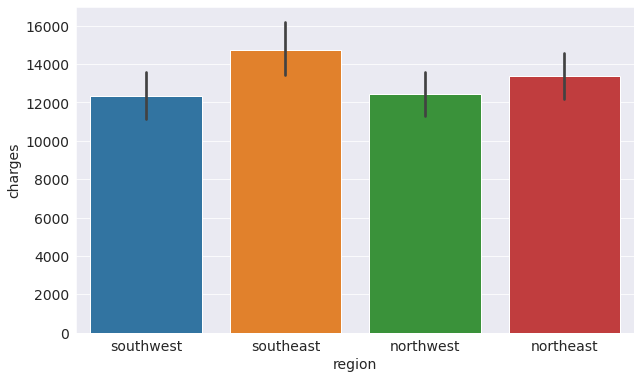

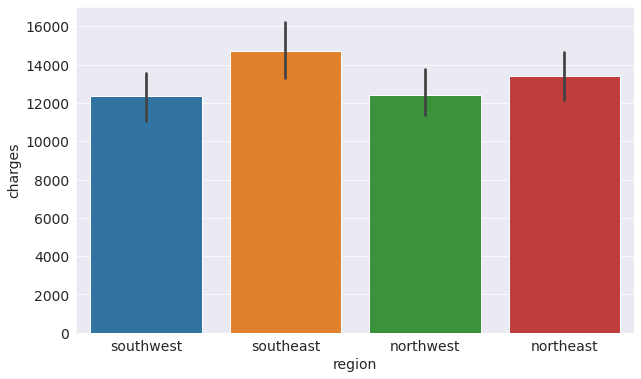

In [237]:
sns.barplot(data=medical_df, x='region', y='charges')

In [238]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [239]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot # shape is 1338 by 4

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [240]:
# print(medical_df.charges.corr(medical_df.northeast))  0.006348771280156071
# print(medical_df.charges.corr(medical_df.northwest)) -0.03990486404043801
# print(medical_df.charges.corr(medical_df.southeast))  0.07398155156575979
# print(medical_df.charges.corr(medical_df.southwest)) -0.04321002899168482

In [241]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [242]:
input12, target12 = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']
model12 = LinearRegression().fit(input12, target12)
predictions12 = model12.predict(input12)
loss12 = calculate_loss(target12, predictions12)
print('Loss: ', loss12)

Loss:  6041.679651174453
Loss:  6041.679651174453


## Smokers using Categorical Features for ML

In [243]:
smokers = medical_df[medical_df.smoker == 'yes']
input13, target13 = smokers[['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], smokers['charges']
model13 = LinearRegression().fit(input13, target13)
predictions13 = model13.predict(input13)
loss13 = calculate_loss(target13, predictions13)
print('Loss: ', loss13)

Loss:  5668.4678821121515
Loss:  5668.4678821121515


## Non-Smokers using Categorical Features for ML

In [244]:
nonsmokers = medical_df[medical_df.smoker == 'no']
input14, target14 = nonsmokers[['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], nonsmokers['charges']
model14 = LinearRegression().fit(input14, target14)
predictions14 = model14.predict(input14)
loss14 = calculate_loss(target14, predictions14)
print('Loss: ', loss14)

Loss:  4573.074988795492
Loss:  4573.074988795492


# Model Improvements

## Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [245]:
model12.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [246]:
model12.intercept_

-12525.547811195444

-12525.547811195444

In [247]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model12.coef_, model12.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

StandardScaler()

In [250]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

array([39.20702541, 30.66339686,  1.09491779])

In [251]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

array([197.25385199,  37.16008997,   1.45212664])

In [252]:
scaled_input = scaler.transform(medical_df[numeric_cols])
scaled_input # 1338 by 3

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [253]:
categorical_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[categorical_cols].values
categorical_data  # 1338 by 6

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [254]:
input15 = np.concatenate((scaled_input, categorical_data), axis=1)
print(input15)

[[-1.43876426 -0.45332    -0.90861367 ...  0.          0.
   1.        ]
 [-1.50996545  0.5096211  -0.07876719 ...  0.          1.
   0.        ]
 [-0.79795355  0.38330685  1.58092576 ...  0.          1.
   0.        ]
 ...
 [-1.50996545  1.0148781  -0.90861367 ...  0.          1.
   0.        ]
 [-1.29636188 -0.79781341 -0.90861367 ...  0.          0.
   1.        ]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.          0.
   0.        ]]
[[-1.43876426 -0.45332    -0.90861367 ...  0.          0.
   1.        ]
 [-1.50996545  0.5096211  -0.07876719 ...  0.          1.
   0.        ]
 [-0.79795355  0.38330685  1.58092576 ...  0.          1.
   0.        ]
 ...
 [-1.50996545  1.0148781  -0.90861367 ...  0.          1.
   0.        ]
 [-1.29636188 -0.79781341 -0.90861367 ...  0.          0.
   1.        ]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.          0.
   0.        ]]


In [255]:
target15 = medical_df.charges # same as >>> target15 = medical_df['charges']
model15 = LinearRegression().fit(input15, target15)
predictions15 = model15.predict(input15)
loss15 = calculate_loss(target15, predictions15)
print(loss15)

6041.679651174453
6041.679651174453


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [256]:
print('Numeric column: ', numeric_cols)
print('Categorical column: ', categorical_cols)
print('Concatenated column: ', numeric_cols + categorical_cols)
print('Model coefficient: ', model15.coef_)
print('Model intercept: ', model15.intercept_)

Numeric column:  ['age', 'bmi', 'children']
Categorical column:  ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
Concatenated column:  ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
Model coefficient:  [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Model intercept:  8466.483215411828
Numeric column:  ['age', 'bmi', 'children']
Categorical column:  ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
Concatenated column:  ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
Model coefficient:  [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Model intercept:  8466.483215411828


In [257]:
weights2_df = pd.DataFrame({
    'feature': np.append(numeric_cols + categorical_cols, 1),
    'weight': np.append(model15.coef_, model15.intercept_)
})
weights2_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. $Smoker$

2. $Age$

3. $BMI$


## Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [258]:
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(input15, target15, test_size=0.1)

In [259]:
modelFinal = LinearRegression().fit(input_train, target_train)
prediction_test = modelFinal.predict(input_test)
final_test_loss = calculate_loss(target_test, prediction_test)
print('Testing Loss: ', final_test_loss)

Testing Loss:  5980.9567262937
Testing Loss:  5896.815869656233


In [260]:
prediction_train = modelFinal.predict(input_train)
final_train_loss = calculate_loss(target_train, prediction_train)
print('Training Loss: ', final_train_loss)

Training Loss:  6049.3543191928
Training Loss:  6061.528913793885


Train loss must be lower that test loss. I don't what happened here!

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer (`w` and `b`) for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

## Summary and Further Reading

We've covered the following topics in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Creating a training and test set for reporting results

Apply the techniques covered in this tutorial to the following datasets:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather 


Check out the following links to learn more about linear regression:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc
